In [1]:
state = 'MT' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from MT_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 0 plans from file.


In [6]:
obj_type = 'bottleneck_Polsby_Popper'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking,
            state=state,
            year=year
        )

Running epsilon constraint method for state MT, objective bottleneck_Polsby_Popper
####################################################################################################

L = 536692 and U = 547533

****************************************
Trying deviation = 5421.125
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 536692 and U = 547533
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1730 rows, 1395 columns and 5825 nonzeros
Model fingerprint: 0x1c188733
Model has 2 quadratic constraints
Variable types: 343 continuous, 1052 integer (1052 binary)
Coefficient statistics:
  Matrix range     [2e-03, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00,

Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1730 rows, 1395 columns and 5825 nonzeros
Model fingerprint: 0x873cfedc
Model has 2 quadratic constraints
Variable types: 343 continuous, 1052 integer (1052 binary)
Coefficient statistics:
  Matrix range     [2e-03, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 925 rows and 662 columns
Presolve time: 0.00s
Pr

     0     0    1.70072    0  108          -    1.70072      -     -    0s
     0     2    1.72483    0  108          -    1.72483      -     -    0s
   764   656    3.57760   14  168          -    2.36038      -  38.8    5s
  9149  6559    4.14133   33   88          -    2.95476      -  35.4   10s
 25381 18024    4.28367   38  110          -    3.39268      -  29.9   15s
 41289 28421    5.62155   42   36          -    3.58213      -  28.7   20s
 57656 39156    6.99335   36  147          -    3.71133      -  28.5   25s
 70669 48124    4.54586   41   19          -    3.78805      -  28.3   30s
 86561 57991    5.57591   46   99          -    3.85899      -  28.2   35s
 102458 67841    4.28666   40   80          -    3.92412      -  28.2   40s
 113483 74062    6.76621   32   33          -    3.95540      -  28.3   45s
 121914 78916    6.27021   39   25          -    3.98261      -  28.2   50s
 129931 83236    6.78130   29  104          -    4.00749      -  28.1   55s
 139291 88184    7.16

 580370 130736    5.83921   36   27    6.81488    5.12525  24.8%  31.9  520s
 584007 131255    6.11620   37   16    6.81488    5.13212  24.7%  31.9  527s
 586853 131524    6.15248   45   54    6.81488    5.13651  24.6%  31.9  531s
 589170 131847    6.66255   40   19    6.81488    5.13959  24.6%  31.9  535s
 591521 132139    6.45913   31  129    6.81488    5.14352  24.5%  32.0  540s
 594343 132753    5.83562   42   67    6.81488    5.14667  24.5%  31.9  545s
 598621 133380 infeasible   42         6.81488    5.15189  24.4%  31.9  551s
 601208 133720    6.46862   36  114    6.81488    5.15609  24.3%  31.9  556s
 603667 134015    6.47575   40   53    6.81488    5.15909  24.3%  32.0  560s
 606503 134566     cutoff   45         6.81488    5.16342  24.2%  32.0  565s
 609435 134888    6.40174   38   52    6.81488    5.16716  24.2%  32.0  570s
 611909 135218    5.82855   37   47    6.81488    5.17055  24.1%  32.0  575s
 614691 135616 infeasible   39         6.81488    5.17435  24.1%  32.0  581s

 786073 155283 infeasible   41         6.81488    5.38144  21.0%  32.3 1061s
 787303 155425 infeasible   43         6.81488    5.38322  21.0%  32.3 1066s
 788703 155446    6.44659   38   94    6.81488    5.38476  21.0%  32.3 1070s
 789770 155541    6.11598   35   19    6.81488    5.38563  21.0%  32.3 1076s
 791051 155626 infeasible   42         6.81488    5.38722  20.9%  32.3 1081s
 792402 155740    6.50634   42    7    6.81488    5.38870  20.9%  32.3 1087s
 793772 155812    6.51614   39   36    6.81488    5.39032  20.9%  32.3 1092s
 795144 155919 infeasible   31         6.81488    5.39166  20.9%  32.3 1096s
 796314 155985    6.08308   44   64    6.81488    5.39327  20.9%  32.3 1100s
 797401 156177     cutoff   39         6.81488    5.39451  20.8%  32.3 1105s
 800751 156467 infeasible   47         6.81488    5.39795  20.8%  32.3 1113s
 801955 156550    5.84452   45   16    6.81488    5.39894  20.8%  32.3 1116s
 803328 156645 infeasible   43         6.81488    5.40051  20.8%  32.3 1120s

 978646 166207    6.24512   31   77    6.81488    5.57609  18.2%  32.6 1630s
 983259 166225    6.36996   39   21    6.81488    5.58019  18.1%  32.6 1639s
 985362 166282 infeasible   41         6.81488    5.58217  18.1%  32.6 1644s
 986814 166266    6.03386   43   13    6.81488    5.58389  18.1%  32.6 1649s
 987025 166266    5.90979   44   14    6.81488    5.58389  18.1%  32.6 1650s
 988812 166276    5.75813   37   24    6.81488    5.58553  18.0%  32.6 1655s
 990653 166332 infeasible   39         6.81488    5.58736  18.0%  32.6 1662s
 992840 166371     cutoff   34         6.81488    5.58958  18.0%  32.6 1666s
 994307 166480    5.74371   31   51    6.81488    5.59121  18.0%  32.6 1670s
 997343 166531     cutoff   45         6.81488    5.59406  17.9%  32.6 1679s
H997732 160824                       6.6675680    5.59406  16.1%  32.6 1679s
 998738 160802     cutoff   39         6.66757    5.59515  16.1%  32.6 1685s
 1000794 160763 infeasible   41         6.66757    5.59721  16.1%  32.6 1690

 1192653 148362 infeasible   43         6.66757    5.71352  14.3%  32.7 2298s
 1194461 148157    5.80200   43   22    6.66757    5.71352  14.3%  32.7 2304s
 1195248 148157 infeasible   39         6.66757    5.71352  14.3%  32.7 2305s
 1196565 147964 infeasible   33         6.66757    5.71352  14.3%  32.7 2311s
 1198595 147709 infeasible   46         6.66757    5.71352  14.3%  32.7 2317s
 1200771 147461    6.15832   43   51    6.66757    5.71352  14.3%  32.7 2324s
 1202771 147129     cutoff   36         6.66757    5.71352  14.3%  32.7 2331s
 1204910 146885    6.33238   35  101    6.66757    5.71352  14.3%  32.7 2336s
 1206671 146576    6.18426   31   42    6.66757    5.71352  14.3%  32.7 2344s
 1208919 146279    6.27896   37  104    6.66757    5.71352  14.3%  32.7 2351s
 1211133 145968 infeasible   43         6.66757    5.71352  14.3%  32.7 2358s
 1213210 145686 infeasible   42         6.66757    5.71352  14.3%  32.7 2364s
 1215359 145395    5.99513   42   10    6.66757    5.71352  14.3

  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+05]
Presolve removed 589 rows and 517 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 20 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -

User-callback calls 126, time in user-callback 0.00 sec
No feasible solution found.

****************************************
No feasible solution found! Gurobi status: 3
****************************************


In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state MT,  objective bottleneck_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 5, 8, 9, 12, 13, 14, 18, 20, 21, 25, 27, 28, 29, 30, 38, 39, 40, 41, 43, 44, 45, 46, 49, 50, 52], [2, 3, 4, 6, 7, 10, 11, 15, 16, 17, 19, 22, 23, 24, 26, 31, 32, 33, 34, 35, 36, 37, 42, 47, 48, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 1, 4, 5, 6, 7, 9, 11, 14, 15, 16, 17, 18, 20

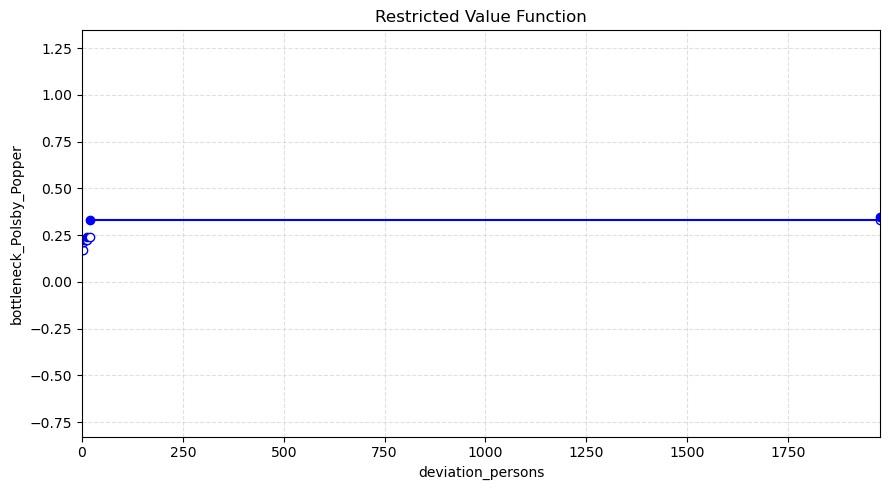

In [15]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors)


####################################################################################################
Pareto maps for state MT, objective bottleneck_Polsby_Popper
####################################################################################################



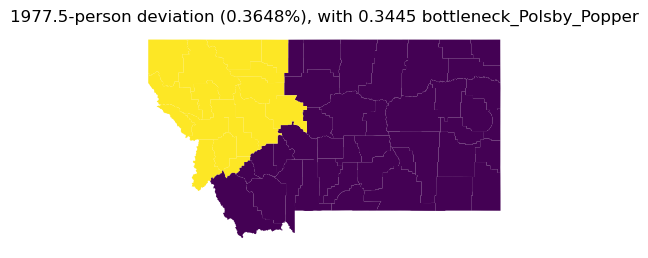

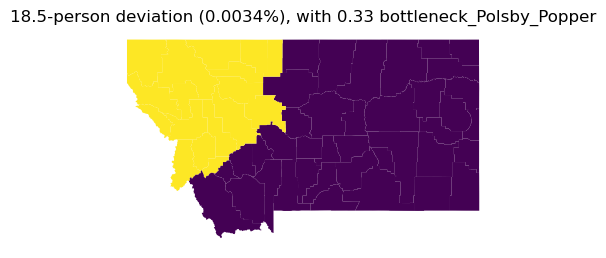

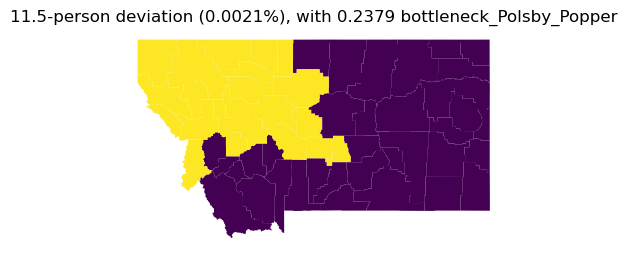

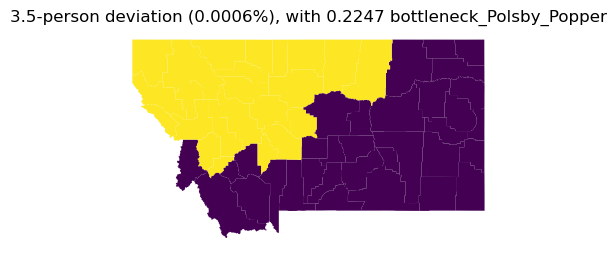

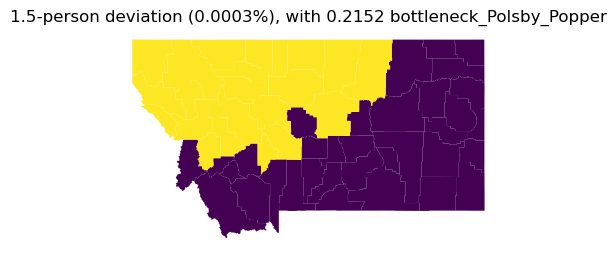

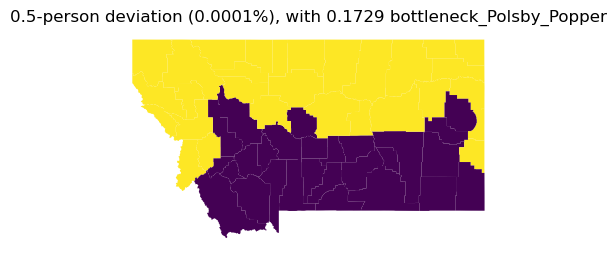

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)